In [90]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import seaborn as sns
import numpy as np

In [2]:
import os

In [3]:
from google.colab import drive   # 코랩 드라이브와 연동
drive.mount('/content/drive')

Mounted at /content/drive


### loading dataset

In [4]:
data_path = '/content/drive/MyDrive/gachon4-2/deeplearning/week2/'

In [5]:
df = pd.DataFrame(pd.read_csv(os.path.join(data_path,"Salary_Data.csv")))

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
df.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [9]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [10]:
df.keys()

Index(['YearsExperience', 'Salary'], dtype='object')

In [120]:
X = np.array(df['YearsExperience'].values)
Y = np.array(df['Salary'].values)

In [121]:
print(X[:3])
print(Y[:3])


[1.1 1.3 1.5]
[39343. 46205. 37731.]


In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=1)

In [139]:
print(len(X_train),len(Y_train))
print(X_train.shape, X_train.dtype)
print(len(X_test), len(Y_test))

21 21
(21,) float64
9 9


### plot EDA

<Axes: xlabel='YearsExperience', ylabel='Salary'>

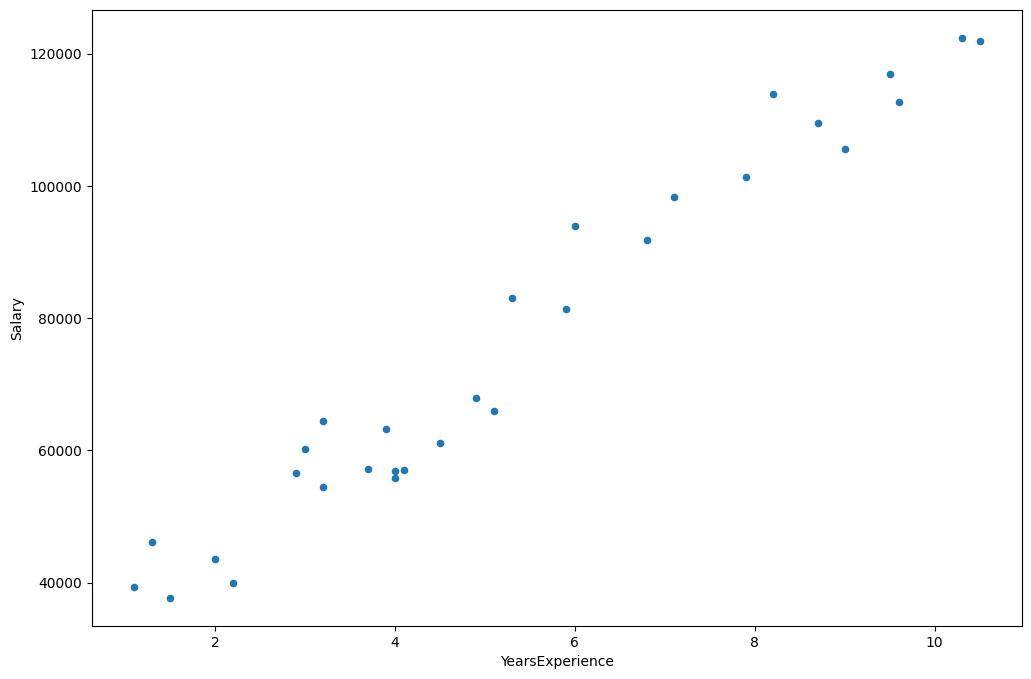

In [33]:
# EDA
import matplotlib.pyplot as plt

df.plot.scatter(x='YearsExperience', y='Salary' , figsize=(12, 8))

### 1) "Decision Tree" model

In [152]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

def preprocess(x):
  x=x.reshape(-1,1)
  x = mm.fit_transform(x)
  return x

In [153]:
X_train=preprocess(X_train)
Y_train=preprocess(Y_train)

X_test=preprocess(X_test)
Y_test=preprocess(Y_test)

In [161]:
# 1. train the decision tree classifier
#scikit learn decision tree model training
DT = tree.DecisionTreeRegressor()
DT = DT.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error
# 2. test the model trained on test set
prediction = DT.predict(X_test)
mean_squared_error(Y_test, prediction)


0.009127301986192366

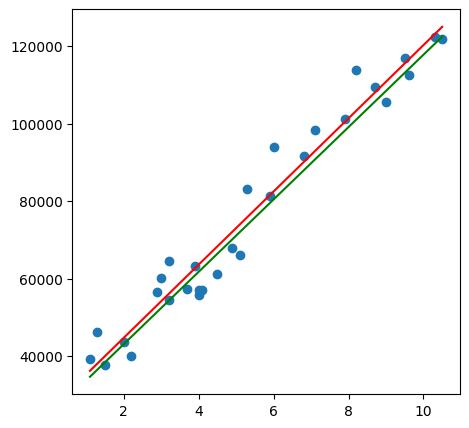

In [160]:
inference = DT.predict(preprocess(X))
YY=preprocess(Y)
inference = mm.inverse_transform(inference.reshape(-1,1)).reshape(1,-1)[0]

plt.figure(figsize=(5, 5))

plt.subplot(1, 1, 1)
plt.plot(X, Y, 'o')
# Create regression line
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), color='red')
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, inference, 1))(np.unique(X)), color='green')


### 2) "RandomForestClassifier" model

In [167]:
from sklearn.ensemble import RandomForestRegressor

# 1. train the LogisticRegression classifier
clf = RandomForestRegressor(max_depth=10, random_state=0)
clf = clf.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error
# 2. test the model trained on test set
prediction = clf.predict(X_test)
mean_squared_error(Y_test, prediction)

<ipython-input-167-e55e27117680>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train, Y_train)


0.012279668953331524

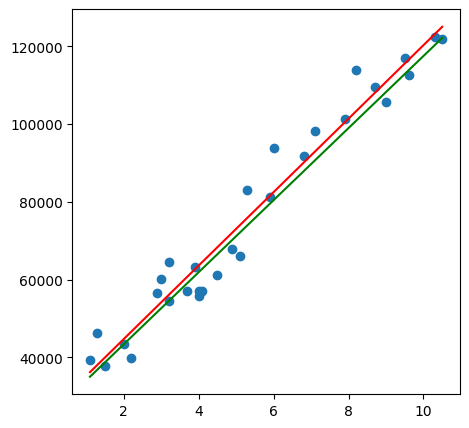

In [169]:
inference = clf.predict(preprocess(X))
YY=preprocess(Y)
inference = mm.inverse_transform(inference.reshape(-1,1)).reshape(1,-1)[0]

plt.figure(figsize=(5, 5))

plt.subplot(1, 1, 1)
plt.plot(X, Y, 'o')
# Create regression line
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), color='red')
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, inference, 1))(np.unique(X)), color='green')

### 3) "SVM" model

In [171]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
clf = make_pipeline(StandardScaler(), SVR(gamma='auto'))
clf = clf.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error
# 2. test the model trained on test set
prediction = clf.predict(X_test)
mean_squared_error(Y_test, prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.006664450548176832

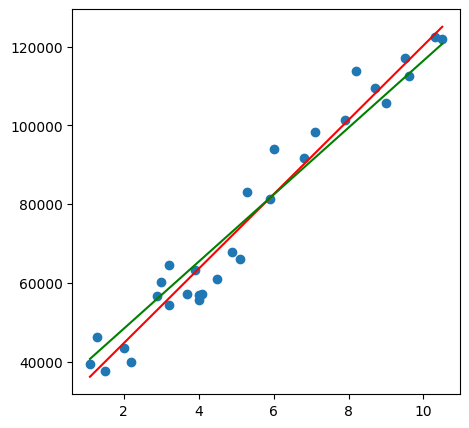

In [172]:
inference = clf.predict(preprocess(X))
YY=preprocess(Y)
inference = mm.inverse_transform(inference.reshape(-1,1)).reshape(1,-1)[0]

plt.figure(figsize=(5, 5))

plt.subplot(1, 1, 1)
plt.plot(X, Y, 'o')
# Create regression line
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), color='red')
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, inference, 1))(np.unique(X)), color='green')